In [15]:
from minee.data.mix_gaussian import MixedGaussian
from minee.data.mix_uniform import MixedUniform
from minee.data.gaussian import Gaussian
import numpy as np
%matplotlib inline

In [16]:
np.random.seed(0)
num_sample = 20
var = []
GT = []
MIs = []
sample_sizes = []
sample_size = [200, 400, 800, 1600]
dim = 5
mean = np.zeros(dim*2).tolist()
rho = 0.9
for i in range(len(sample_size)):
    MG = Gaussian(sample_size=sample_size[i], rho=rho, mean=mean)
    diff = []
    GT.append(MG.ground_truth)
    for _ in range(num_sample):
        data = MG.data
        sample_sizes.append(sample_size[i])
        if dim==1:
            MI = np.average([MG.I(X[0],X[1]) for X in data])
        else:
            MI = np.average([MG.I(X[0:dim],X[-dim:]) for X in data])
        diff.append((MI-GT)**2)
        MIs.append(MI)
    var.append(np.average(diff))

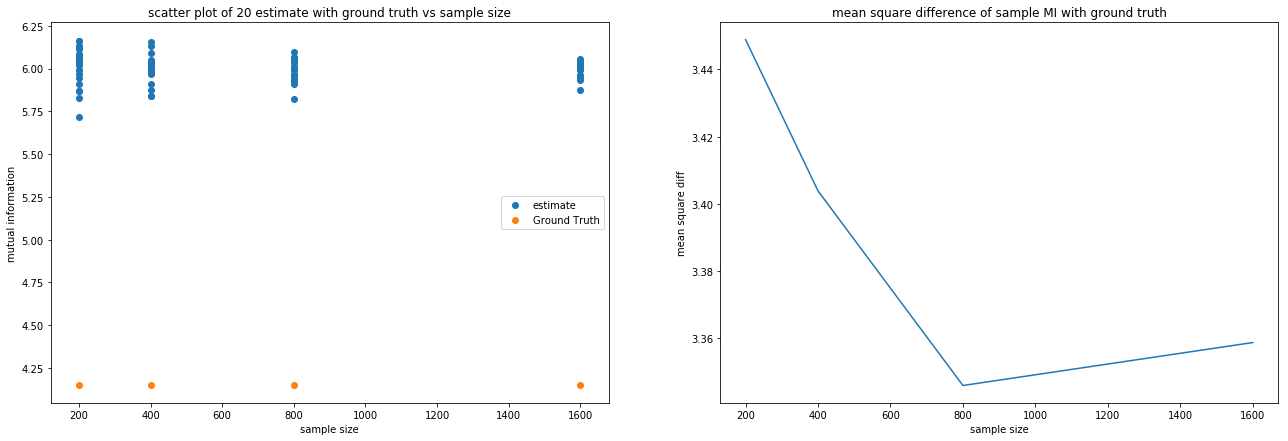

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(22, 7))

axCur = ax[0]
axCur.scatter(sample_sizes, MIs, label="estimate")
axCur.scatter(sample_size, GT, label="Ground Truth")
axCur.legend()
axCur.set_title("scatter plot of {} estimate with ground truth vs sample size".format(num_sample))
axCur.set_xlabel("sample size")
axCur.set_ylabel("mutual information")

axCur = ax[1]
axCur.plot(sample_size, var)
axCur.set_title("mean square difference of sample MI with ground truth")
axCur.set_xlabel("sample size")
axCur.set_ylabel("mean square diff with ground truth")
plt.savefig("{}-dim rho={} gaussian sample mi plot and mean-square-diff with ground truth.png".format(dim, rho))
plt.show()
plt.close()